In [43]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, OscillatoryIntegrals, QuadGK
gr();

# M3M6: Methods of Mathematical Physics 2018

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\rR{{\rm R}}
\def\rL{{\rm L}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
\def\Ei{{\rm Ei}\,}
\def\pr(#1){\left({#1}\right)}
\def\br[#1]{\left[{#1}\right]}
\def\set#1{\left\{{#1}\right\}}
\def\ip<#1>{\left\langle{#1}\right\rangle}
\def\iip<#1>{\left\langle\!\langle{#1}\right\rangle\!\rangle}
$$

Dr Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Solution Sheet 4



## Problem 1.1

We want to solve
$$
\int_{-1}^1 \log |x-t| u(t) \dt = {1 \over x^2 + 1}
$$
differentiating and multiplying though by $1/\pi$ we have
$$
{1 \over \pi} \dashint_{-1}^1 {u(t) \over t-x} u(t) = {2 x \over \pi (1+x^2)^2}
$$

This is an inverse Hilbert problem so we know
$$
u(x) = -{1 \over \sqrt{1-x^2} } H[\sqrt{1-t^2} f(t)]  + {C \over \sqrt{1-x^2}}
$$
for 
$$
f(x) =  {2 x \over \pi (1+x^2)^2}.
$$

We determine the Cauchy transform of $\sqrt{1-x^2} f(x)$ using the usual methods: start with the ansatz
$$
\phi(z) = {\sqrt{z-1} \sqrt{z+1} \over 2 \I} {2 z \over \pi (1+z^2)^2}
$$
This decays at infinity so we just need to remove the poleas at $\pm \I$. Here we determine:
$$
\phi(z) = {\sqrt{\I -1 } \sqrt{\I + 1} \over \pi} \left(-{1  \over 4 (z-\I)^2}  + {\I \over 8  (z-\I)} + O(1) \right)
$$
and
$$
\phi(z) = {\sqrt{-\I -1 } \sqrt{1-\I } \over \pi} \left({1  \over 4 (z+\I)^2}  + {\I \over 8  (z+\I)} + O(1) \right)
$$
Telling us that
$$
C[\sqrt{1-t^2} f(t)](z) =  {\sqrt{z-1} \sqrt{z+1} \over 2 \I} {2 z \over \pi (1+z^2)^2} -  {\sqrt{\I -1 } \sqrt{\I + 1} \over \pi} \left(-{1  \over 4 (z-\I)^2}  + {\I \over 8  (z-\I)} \right) -  {\sqrt{-\I -1 } \sqrt{1-\I } \over \pi} \left({1  \over 4 (z+\I)^2}  + {\I \over 8  (z+\I)} \right)
$$
Thus we have
$$
H[\sqrt{1-t^2} f](x) = \I (C^+ + C^-)[\sqrt{1-t^2} f](x) = -  {2\I \sqrt{\I -1 } \sqrt{\I + 1} \over \pi} \left(-{1  \over 4 (x-\I)^2}  + {2\I \over 8  (x-\I)} \right) -  {2\I \sqrt{-\I -1 } \sqrt{1-\I } \over \pi} \left({1  \over 4 (x+\I)^2}  + {\I \over 8  (x+\I)} \right)
$$

In other words, for
$$
\tilde u(x) = {2\I \sqrt{\I -1 } \sqrt{\I + 1} \over \pi \sqrt{1-x^2}} \left(-{1  \over 4 (x-\I)^2}  + {2\I \over 8  (x-\I)} \right) -  {2\I \sqrt{-\I -1 } \sqrt{1-\I } \over \pi \sqrt{1-x^2}} \left({1  \over 4 (x+\I)^2}  + {\I \over 8  (x+\I)} \right)
$$
we have
$$
u(x) =  \tilde u(x) + {C \over \sqrt{1-x^2}}.
$$


To find $C$ we impose the condition that
$$
\int_{-1}^1 \log|t| u(t) \dt = 1
$$
We thus need to determine $C$. Recall from Lecture 19 that
$$
{1 \over \pi} \int_{-1}^1 {\log(z-x) \over \sqrt{1-x^2}} \dx = 2 \log(\sqrt{z-1}+\sqrt{z+1}) - 2 \log 2
$$
Thus for $x \in [-1,1]$ we have
$$
{1 \over \pi} \int_{-1}^1 {\log|x-t| \over \sqrt{1-t^2}} \dt = 2 \Re(\log(\I \sqrt{1-x}+\sqrt{x+1}) - 2 \log 2)
$$
or in particular 
$$
{1 \over \pi} \int_{-1}^1 {\log|x| \over \sqrt{1-x^2}} \dx = \log(1/2)
$$
Thus we want to solve
$$
\int_{-1}^1 \log|t| \tilde u(t) \dt + C {\log(1/2) \over \pi} = 1
$$
i.e.
$$
C = (1 - \int_{-1}^1 \log|t| \tilde u(t) \dt)  {1 \over  \pi \log(1/2)}
$$



_Check derivation_

Let's check the derivation. First we can calculate $u$ numerically:

In [5]:
L = SingularIntegral(0) : JacobiWeight(-0.5,-0.5,Chebyshev())


x = Fun()
g = (1/(x^2+1))
u = (π*L) \ g

π*logkernel(u, 0.1) - g(0.1)

-2.220446049250313e-16

Differentiating it satisfies $H u = g'/(-\pi)$:

In [6]:
hilbert(u,0.1) ≈ g'(0.1)/(-π) ≈ (2*0.1)/(π*(1+0.1^2)^2)

true

The Cauchy transform also works:

In [8]:
f = g'/(-π)

z = 1+im
ψ = z -> sqrt(z-1)sqrt(z+1)/(2im) * 2z/(π*(1+z^2)^2) - 
                sqrt(im-1)sqrt(im+1)/π * (-1/(4*(z-im)^2) + im/(8(z-im))) - 
                sqrt(-im-1)sqrt(1-im)/π * (1/(4*(z+im)^2) + im/(8(z+im)))

cauchy(sqrt(1-x^2)*f, z) ≈ ψ(z)

true

Therefore the Hilbert transform is given by:

In [12]:
H = x-> - 2im*sqrt(im-1)sqrt(im+1)/π * (-1/(4*(x-im)^2) + im/(8(x-im))) - 
            2im*sqrt(-im-1)sqrt(1-im)/π * (1/(4*(x+im)^2) + im/(8(x+im)))

hilbert(sqrt(1-x^2)*f)(0.1) ≈ H(0.1)

true

We thus have an expression for $u$, we are just missing the constant:

In [81]:
ũ = x -> -H(x)/sqrt(1-x^2)

C = u(0.0) + H(0.0)
u(0.1) ≈ ũ(0.1) + C/sqrt(1-0.1^2)

true

We can find $C$ interms of the relevant integral, which we call $D$:

In [92]:
D = quadgk(x -> x == 0 ? 0.0 : ũ(x)*log(abs(x)),-1,1)[1]
C, (1-D)/(π*log(1/2))

(-0.3247204711377926 + 0.0im, -0.32472047136213555 + 0.0im)

### Problem 1.2

Since $\int_{-1}^1 x \dx = 0$, we have no logarithmic growth at infinity. Thus by the formula in Lecture 19 we find for
$$
U(x) = \int_x^1 t \dt = {1 - x^2 \over 2}
$$
that
$$
\int_{-1}^1 \log|z-x| x \dx = \Re{-2 \I \pi C U(z)}
$$

So we just have to work out the Cauchy transform. Try as an ansatz
$$
(1 - z^2 \over 2) {\log(z-1) - \log(z+1) \over 2 \pi \I}
$$
We only need to remove the growth at infinity. We do so via:
$$
\log(z-1) - \log(z+1)  = -{2 \over z} + O(z^{-3})
$$
telling us
$$
C U(z) = {1 - z^2 \over 2} {\log(z-1) - \log(z+1)  \over 2 \pi \I} + {z \over 2 \pi \I}
$$
and
$$
\int_{-1}^1 \log|z-x| x \dx = \Re \left({1 - z^2 \over 2} (\log(z-1) - \log(z+1)) - z \right)
$$

We can confirm the formula:

In [93]:
z = 2+im; π*logkernel(x,z) ≈ real((1-z^2)/2 * (log(z-1)-log(z+1)) - z)

true

## Problem 2

### Problem 2.1

From Lecture 19 we know that we want to solve

1. $v_{xx} + v_{yy} =0$ for $z \notin [-1,1] \cup \I$
2. $v(z) \sim \log|z|$ as $z \rightarrow \infty$
3. $v(z) \sim \log|z-\I|$ as $z \rightarrow \I$
3. $v(x,0) = D$ for some unknown constant $D$ on $[-1,1]$. 

### Problem 2.2


We write
$$
v(x,y) = \int_{-1}^1 u(t) \log|z-t| \dt + \log|z-\I|
$$
The behaviour at infinity requires that $\int_{-1}^1 u(t) \dt = 0$. We further have the singular integral equation
$$
  \int_{-1}^1 u(t) \log|x-t| \dt = C - \log|x-\I|
$$
which follows from $D = v(x,0)$

We can actually solve this numerically:

In [150]:
ũ = SingularIntegral(0) \ (-log(abs(x-im))/π)
u = ũ - sum(ũ)/(π*sqrt(1-x^2)) # ensure integrates to zero
v = z -> π*logkernel(u, z) + log(abs(z-im))
D = v(0)

0.18822640645958963

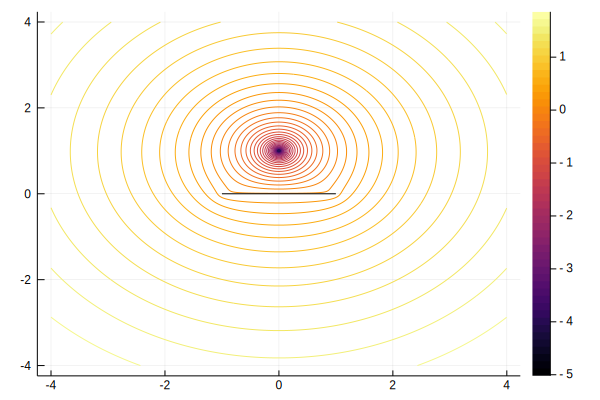

In [151]:
xx = yy = -4:0.011:4
V = v.(xx' .+ im*yy)

contour(xx, yy, V; nlevels=50)
plot!(domain(x); color=:black, legend=false)


#### Problem 2.3

As usual for logarithmic singular integral equations we want to solve
$$
\dashint_{-1}^1 {u(t)  \over t-x} \dt = f'(x) 
$$
we need to be a bit careful differentiating $f$:
$$
{\D \over \dx} \log|x-\I| = {\D \over \dx} \log\sqrt{x^2 + 1} = { x \over x^2 + 1}
$$
Now we do our usual game and solve for $u$ using the inverse Hilbert transform formula. That is, first calculate
$$
C[\sqrt{1-x^2} {x \over x^2+1}](z) = {z \sqrt{z-1} \sqrt{z+1} \over 2\I (z^2+1)} - {1 \over 2 \I} + {\I \sqrt{\I - 1} \sqrt{\I+1} \over 4 (z-\I)} +  {\I \sqrt{-\I - 1} \sqrt{-\I+1} \over 4 (z+\I)}
$$
Therefore, we know that
$$
u(x) =  {\sqrt{\I - 1} \sqrt{\I+1} \over 2 \pi (x-\I)\sqrt{1-x^2}} +  {\sqrt{-\I - 1} \sqrt{-\I+1} \over 2 \pi (x+\I) \sqrt{1-x^2}} + {C \over \sqrt{1-x^2}}
$$
We can show (e.g. by finding its Cauchy transform and lookin at the asymptotic behaviour) that
$$
\int_{-1}^1\left[ {\sqrt{\I - 1} \sqrt{\I+1} \over 2 \pi (x-\I)\sqrt{1-x^2}} +  {\sqrt{-\I - 1} \sqrt{-\I+1} \over 2 \pi (x+\I) \sqrt{1-x^2}} \right] = -1
$$
Combined with the fact that
$$
\int_{-1}^1 {1 \over \sqrt{1-x^2}} = \pi
$$
we find that $C = 1/\pi$.

_Verification_ Let's check our work. First we see that the Hilbert transform of $u$ does indeed satisfy the specified equation (using the numerical `u` as calculated above):

In [154]:
fp = x -> x/(x^2+1)

π*hilbert(u, 0.1) ≈ fp(0.1)

true

And the Cauchy transform of $\sqrt{1-x^2} f'(x)$ satisfies the derived formula:

In [156]:
C = z -> z * sqrt(z-1)sqrt(z+1)/(2im*(z^2+1)) - 1/(2im) + im*sqrt(im-1)sqrt(im+1)/(4(z-im)) +
         im*sqrt(-im-1)sqrt(-im+1)/(4(z+im))
cauchy(sqrt(1-x^2)fp(x), z) ≈ C(z)

true

Therefore we can invert to the Hilbert transform for $f'$:

In [166]:
w = -hilbert(sqrt(1-x^2)fp(x))/sqrt(1-x^2)
w̃ = sqrt(im-1)sqrt(im+1)/(2(x-im) * sqrt(1-x^2)) +
         sqrt(-im-1)sqrt(-im+1)/(2(x+im) * sqrt(1-x^2))
hilbert(w,0.1) ≈ hilbert(w̃,0.1) ≈ fp(0.1)

true

And we have recovered $u$ up to $C/\sqrt{1-x^2}$:

In [180]:
C = 1/π

u(0.1) ≈ w̃(0.1)/π + C/sqrt(1-0.1^2)

true

## Problem 3

### Problem 3.1 

To be analytic at all we need decay at either $\pm \infty$, this has neither so is not defined.

### Problem 3.2

It has exponential decay in the right-half plane, therefore
$$
\E^{\gamma x} f(x) = {\E^{\gamma x } \over 1 + \E^x}
$$
has exponential decay at both $\pm \infty$, provided $0 < \gamma < 1$. Therefore, we can take the strip $0 < \Im s < 1$.  (Note in each case the contour for the inverse Fourier transform can be any contour in the domain of analyticity.)

We can verify this by exact computation using Residue calculus: for $0 < \Im s < 1$, we can integrate over a rectangle to get:
$$
\left(\int_{-R}^R + \int_R^{2\I \pi + R} +  \int_{2 \I \pi + R}^{2\I \pi - R} + \int_{2 \I \pi - R}^{-R} \right) {\E^{-\I s x} \over 1 + \E^x} \dx = 2 \pi \I \Res_{z = \I \pi } {\E^{-\I s z} \over 1 + \E^z} = 
- 2 \pi \I \E^{\pi s}
$$
Note that 
$$
{\E^{-\I s (R + \I t)} \over 1 + \E^{R + \I t}} = 
{\E^{-\I R \Re s + R \Im s  + t} \over 1 + \E^{R + \I t}} \rightarrow 0
$$
and
$$
{\E^{-\I s (-R + \I t)} \over 1 + \E^{R + \I t}} = 
{\E^{\I R \Re s - R \Im s + t} \over 1 + \E^{R + \I t}} \rightarrow 0
$$
uniformly in $t$ as $R \rightarrow \infty$, hence we deduce that
$$
\left(\int_{-\infty}^\infty  +  \int_{2 \I \pi + \infty}^{2\I \pi - \infty}\right) {\E^{-\I s x} \over 1 + \E^x} \dx  = 
- 2 \pi \I \E^{\pi s}
$$
Now note that
$$
\int_{2 \I \pi + \infty}^{2\I \pi - \infty} {\E^{-\I s t} \over 1 + \E^t} \dt  = \int_{\infty}^{-\infty} {\E^{-\I s (x+2 \I \pi)} \over 1 + \E^x} \dx = -\E^{2 \pi s} \int_{-\infty}^\infty  {\E^{-\I s x} \over 1 + \E^x} \dx 
$$
Therefore, we have
$$
\int_{-\infty}^\infty  {\E^{-\I s x} \over 1 + \E^x} \dx  = - 2 \I \pi {\E^{\pi s} \over 1 -\E^{2 \pi s}} = \I \pi {\rm csch}\, \pi x
$$
which has poles at $0$ and $\I$:

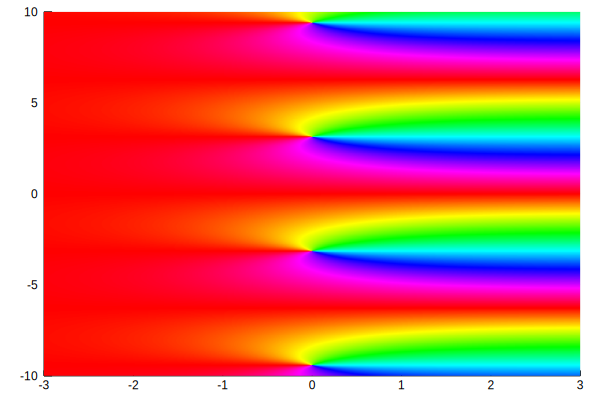

In [9]:
phaseplot(-3..3, -10..10, z -> 1/(1+exp(z))) #integrand

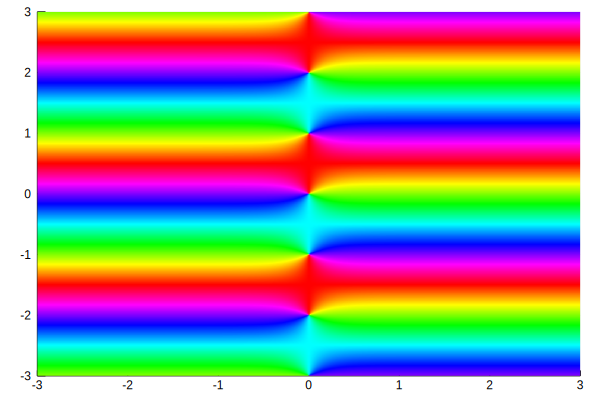

In [12]:
phaseplot(-3..3, -3..3, z -> im*π*csch(π*z)) # transform

### Problem 3.3 

Here $\E^{\gamma x } f(x) = \E^{(\gamma+2) x}$ has decay at $+\infty$ proved $\gamma < -2$, hence we have the strip $\Im s < -2$.

Indeed, its Fourier transform is 
$$
-{\I \over 2 \I +s}
$$
by integration by parts.

### Problem 3.4 

Here it's $\Im s > 0$: unlike 1.1, we now have decay at $x \rightarrow \infty$ since $f_{\rm L}(x)$ is identically zero.

It's Fourier transform is determinable by integration-by-parts:
$$
\hat f(s) = \int_{-\infty}^0 x \E^{-\I s x} \dx = {1 \over \I s} \int_{-\infty}^0\E^{-\I s x} \dx = {1 \over s^2}
$$

### Problem 3.5

The Fourier transforms are given above.

### Problem 3.6

$$\int_{-\infty}^\infty \delta(x) \E^{\I s x} \dx = 1$$

It's actually an entire function, but non-decaying. This is hinting at the relationship between smoothness of a function and decay of its Fourier transform, and vice-versa: since $\delta(x)$ "decays" to all orders, we expect its Fourier transform to be entire, but since its n ot smooth at all, we expect no decay, so on a formal level we can predict the analyticity properties.

## Problem 4

### Problem 4.1

Note that
$$
K(z) =  {3\over 2} \E^{-|x|} \Rightarrow \hat K(s) = {3 \over 1+s^2}
$$
Provided $-1 < \Im s < 1$, and 
$$
\widehat f_{\rm R}(s) = -{\I \over s} - {\alpha \over s^2}
$$
for $\Im s < 0$.  Define
$$
h(s) = - \widehat f_{\rm R}(s) = {\I \over s} + {\alpha \over s^2}
$$

In [11]:
α = 0.3
x = Fun(0..100)
f = 1  + α*x
h = s -> (im/s + α/s^2)

γ = -0.5  # we take the Fourier transform on R + im*γ
s = -0.5 + im*γ

-sum(f*exp(-im*s*x)) - h(s)

5.773159728050814e-15 + 7.549516567451064e-15im


Transforming the equation, we have
$$
\Phi_+(s) - (1 + \hat K(s)) \Phi_-(s)  = {\I \over s} + {\alpha \over s^2}
$$
where
$$
1 + \hat K(s) = {4 + s^2 \over 1 + s^2} = {(s-2 \I) (s+2 \I) \over (s+\I)(s-\I)}
$$
This is very close to the the example we did in lectures, so we already know the homogenous solution:
$$
\kappa(z) =  \begin{cases} {z + 2\I  \over z + \I}  & \Im z > \gamma \\
                            {z - \I  \over z - 2\I} & \Im z < \gamma
                            \end{cases}
                            $$
which is valid for $-1 < \Im s < 0$.



In [7]:

g = s -> (4+s^2)/(1+s^2)

κ = z -> imag(z) > γ ? (z+im*2)/(z+im) :
                       (z-im)/(z-im*2)


phaseplot(-3..3, -3..3, κ)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
<image width="551" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAicAAAFsCAYAAAAXJxnvAAAgAElEQVR4nO2da7Lkts5l0eXTY+j5
T7An8MV1949r2TKLDwDEY4PiinC4TiZFUhJF7ARA6n/9P/o//4+O4D/ZHWDwZ3L7Udco4jw9z8Wj
/5b9te4f6LPzh3F9vwzrsu4bkW3/Wjz62+LZ/zcR5zIj6jx3yL5GBlS4zEz+IPw7kn25o65PxHmi
3+vLBYQrTOzInsJXVDCDTNAvtQL0O3PgJe/ylfO8XD7OVx519PNEN31CfrI74EN7l9Dc1s8ozwjz
PNcm4pp4n6fXufwi+z7/QXb9zBw/BbE2KlVCOt7GKtJYZxpeVFFymBhp+fWPH+jkM0U9v8xRH3k9
UJ/uGRX7fClJxaF2hUkeqObMir/O71f302PPHPG8viJQPDnlPC4XI055JK4w+Ten3NeWjvSYhHVG
VwEtRCLlfV4o59I+BZHu+qjrERHiQQ/vePTxEgryCqIHTwN2cq47ohghOkuQCM5FkXMSmbPgDaJQ
IfLJebicxx0nS1ANzgULtHFykiAhUp3Pxi05LfyDdi4ZT0v1NYcVMhXRxtmFzfWa+JPxeFxh4seG
TDBYrdNrGckLIQHNk5KxKiPCM+b5i/+GTuQAXrOTJugoKguTr4uSE8a78Tk4LSVGM/IakMJXGe57
b4NVKSRRqa+XEiAZxhVXmPhRXZQ49j9gnxP0PUdWoIiULC9KRYGCnhxrvefJFU5dULerrxTOOU2Y
XFGyR2C/EzZhQzH2UlC8QdEi5QqUywWaK0zWIIiSqoKEKKXvibesckItQr9P2gUJYeaIBmEMXVh8
8VZdYWJL1TGUaKYBtq+vmlCL4EmJ9KJ4e7w8zsW6zzeEctkENdT0cEWJHdUECVh/s2/fgGpeley+
gt5GFegBecRrjdinZBAvydeFSSTZ55JtEiSAmlsAz8mMSvkp2X2N+lWffZ4ncfNi4AGctEvyFY9J
pfEC3ldwcfJQKfSTabxPCfPctwLHAySUwCdNMRX28fMy6FeUYIDevw7Zzq8NQH1Rf5PZvxOSZdHD
O5dLAleY9MmyZNcMuVHEczIDfR+VrMTZ99Pq/Qvf61d3BQ/Kbv+s+nOTdf/GylBZTOpfzTOp/iaM
GcjGHrlvQgp7TkYg352TPSmVPCiXy+UKEwXXvIRx6Mz/B+H6s7L6dQXKP6Ct3kEcpx/ndK/JFSYy
0M0JYt82+Yl1/2eAGvbJSJyNSOSsEuIBSgC9XGZcYfJfTn1RuwS0/njw61//e3/66/ePjwLt7p7o
RUG7xt6gPC8o/UgE5RKg9COKK0z8QeuPJR3pMUmIPdmjgrZXR0bSrHcCJfrL94iwvCdoY/KjoBmA
Cl6Tk4QJ2v0nwuyTBYv7ylytM6ulsnBBDPlEGinvMI/HuVj3+a6W+YdkgXTKJIy0WujhipI5SGMP
qS+7bNxDg9t/UhgIKbMoepMAz3tYaQ3k5XIY1YRJtElBmvJR+rKLwT003OfkJO8Kwkv9iOL74elJ
8fKiWPQVyXuy25cTPDhKdg0a0godKyOFvNCt5auCpCrO9ytoOFT2rqDI2S9st6ihUl8vl0AqPRpf
EyYoZkVDkDkP3iG2cpItgjclMoHT6xc4UhLqGyvPDoL35CIGxWuCbLCqbGM0I/P6It/bFQlCN3H7
+t7ZVhEsmUIlsu0qAsWyn1cYXJJAToCtLEyuIJEB4nED6cZDxX1WTh/5VXZsQhozSH25hIB0y68w
+YfTp2crAE0vUFdawK7UlMwAYkTbXxMoCLPKTh+qPDeG7Jxy9dv95gqT/3L6lGwFsJkt8Fbi0ZVD
DAEhhHu82vVayYMa4vnyqpmE0FaVybwHwiohohrC5NTNqdHHL6gAmVFAnIyIeE/MDlkbWnkbFo/r
fvM8LhcoUJ2aMzIEwhUlbhQWJw/t1UcTKxnelIg2PXZqJcLZb4Qo33tyRZs7u8blNK9JNVFyBcm/
KSxGWg46lQfgINqRTxKqLxl1DETxofP/0Kl2ucIkDlRhgmz2lBx2Om8A04+JKCdbCvWJGoHUX6S+
XI4CaWgh9YVDxhSKdo1QTZwRB4R1OCCGfqLDPZ45MKh5KFab/u30Zffa3NCOG5kLorLDSW8qeUwi
BQKiGPkQP/07cPpkiJZMG5k862nsrFeoXMN8ubhyhUleO1y+Ikqa6z7wnLR351QDgbadfpQx9vai
IAqU7OTUykuLL//iFK9JFWHyRW/JFwTJ4lozwzqrO3aCeEEJ/USGe7xEyhUotmjb/YAg0k7iVffD
+JIw+ZKn5EQxsnldjXJOEF6KZw1C6KeyJwVVoGRSSSwEXm8E48DlBCOCLky+5Ck5YTy9MbyeDgmx
s95VNC7ZoZ/KnhTra2eVJFsxvHOCOANBO4GeEM5BXqn/FU9JdUESdP2CV+tU97AgCJWqSbOWG6MR
3fyPy6fIFkZvrjCRcwWJmMSlxNWTbrPCPlECD1mgWLDTl6xXE2hACE86UGmyR/CYWFFRmGR6SpDu
nYRs7xJB7XMyuhroBiDTm+JtJJFzURA8KNGJqje0s010SCdbmCB7TE4VJZUECYAIGVHgMiJuzTci
a7u+ak95gWF3uVz+4QqTNZV2ay1gVoE8JysqhYEywhcRXhRUD8rNP7kcCIrXpJIwud6SPuBCpEch
cdKCvrNtb7RGGEFPkWKd73KCQKkS2jlIhEWHWDJCOqcJk5M8JVeIhIB+mYWg+6oiL7f3tfja7Ifa
9gWSE4ZjhUczespHtpjo5k9IYc/JDOTk2ugEWs/VPVZemq++oA/dmxGQgIs+mWqMUWWPCfILBb3r
HYEmSNCfGSPQLrszaNIyOoMK6dy9QJqdLxcB2cKkAtFeEqTpAM18OXOo52QF2mZwkXtRePwatqwT
3ZtgjeZ8K+2zAkDWjrDVQPeaRBlmpPv+ITHS8sO7EycbC6TE2qiQj4dxs6zTIsSy05dT9yE5QPgh
GY4eGUIIyVlYVZQgjKuvCZHFNWd6TrJWnmSB8Ms0wptyvSj2bZ+Ye/JBInNNMg3j14XJFSUxKK7z
RljnC4IFRaREeFGI7M4TxYOAcP88QbnOwJw88SOdm2VfvhK+Qbp/lhhdV+Ock1NDRNmhn4rhHivR
Y+FBqrAXyaHvwKnGF/ZQ2WnXsg/e9fXIEiSnCJHA65eQEJv9Zl8rsn6VR1w/61/kFvVVew/O5bLg
ChO/+t5kekhOECVJ1y95tc7qrCsYhcxt9T1/bVuLr6+9qC+qLWk7hcWWdJKUGoZIsVBVmFxRMqei
GMkObw0AX0pc0cuS4VHxFilIXpSMzdIuFwAyN3fbbT+ivocrStaACpI34OLkTbUE3Iy9VLx+FV+D
Hus9QcLxHKpN6D0ivSYncYIwqTJ+i463QuKkx+iqo4mWSKHSXhOra+GRLJvlQYkO75CwPe/Qzgfw
DulUSYBF85hYG/Row4ssSIqKkBHFxckI5HBQdNjH2ptiKbQyE2WvQb8UobowuV4SPw4TJG8OPrWH
X6//kIh8UYLX+SPPXF5to40jDQXPoWCXfyP6JYK7oD7ekdM54vtsUE2aMYd6TkYg5q1ErvbxSJy1
8ATtemOiQzya9rxX1VxP0N+ghXQqhXKsDLGXKPEGUYh8lI+Jkx5eORpaIsI+Homz1ziu

In [8]:
s = 0.1 + γ*im 
κ₊ = κ(s + eps()*im)
κ₋ = κ(s - eps()*im)

κ₊ - κ₋*g(s)

-1.3322676295501878e-15 - 2.7755575615628914e-16im



We thus get the RH problem
$$
Y_+(s) - Y_-(s) = h(s)/\kappa_+(s) =  ({\I \over s} + {\alpha \over s^2})  {s + \I  \over s + 2 \I}
$$
We see this has poles at $0$ and $-2 \I$, so using partial fraction expansion we get
$$
({\I \over s} + {\alpha \over s^2})  {s + \I  \over s + \sqrt{3} \I} = 
{\alpha \over 2 s^2}- {\I (\alpha-2) \over 4 s}  +{\I (2+\alpha) \over 4 (s+2 \I)}
$$
Therefore, splitting the poles between those above and below $\gamma$, we have
$$
Y(z) = \begin{cases} 
 {\I (2+\alpha) \over 4 (z+2 \I)} & \Im z > \gamma \\
-{\alpha \over 2 z^2}+{\I (\alpha-2) \over 4 z} & \Im z < \gamma
\end{cases}
$$

In [91]:

s = 0.1 + γ*im 
Y = z -> imag(z) > γ ? im*(2+α)/(4*(z+2im)) :
                     - α/(2z^2) + im*(α-2)/(4z)


Y₊ = Y(s + eps()*im)
Y₋ = Y(s - eps()*im)

Y₊ - Y₋  - h(s)/κ₊

5.551115123125783e-16 - 4.440892098500626e-16im

We therefore have 

$$
\Phi(z)  = \kappa(z) Y(z) = \begin{cases} 
 {\I (2+\alpha) \over 4 (z+ \I)}  & \Im z > \gamma \\
(-{\alpha \over 2 z^2}+{\I (\alpha-2) \over 4 z}  ) {z - \I  \over z - 2\I} & \Im z < \gamma
\end{cases}
$$

In [92]:
Φ = z -> imag(z) > γ ? im*(2+α)/(4*(z+im)) :
                      (-α/(2z^2) + im*(α-2)/(4z))*(z-im)/(z-2im)
Φ₊ = Φ(s+eps()im) 
Φ₋ = Φ(s-eps()im) 

Φ₊ - Φ₋*g(s) - h(s)

8.881784197001252e-16 - 1.1102230246251565e-15im

Finally, we recover the solution by inverting 
$\Phi_-$, using Residue calculus in the upper half plane: for $x > 0$ we have
\begin{align*}
u(x) &= {1 \over 2 \pi} \int_{-\infty+ \I \gamma}^{\infty + \I \gamma} (-{\alpha \over 2 z^2}+{\I (\alpha-2) \over 4 z}  ) {z - \I  \over z - 2\I}  \E^{\I z x}  \dz \\
&= \I (\Res_{z = 0} + \Res_{z = 2\I}) (-{\alpha \over 2 z^2}+{\I (\alpha-2) \over 4 z}  ) {z - \I  \over z - 2\I}  \E^{\I z x} = {1+x \alpha \over 4} - {\alpha+1 \over 4} \E^{-2 x}
\end{align*}

Did it work? yes:

In [93]:
t = Fun(0 .. 50)

u = (1+t*α)/4 - (α-1)/4*exp(-2t)

x = 0.1

u(x) + 3/2*sum(exp(-abs(t-x))*u) , f(x)

(1.0300000000000011, 1.03)

### Problem 4.2

Setting up the problem as above, we arrive at a degenerate RH problem:
$$
\Phi_+(s) - g(s) \Phi_-(s) = h(s)
$$
where 
$$g(s) = \widehat K(s) = {2\alpha \over \alpha^2 +s^2}= {2 \alpha \over (s-\I \alpha)(s+\I \alpha)} $$
and
$$ 
h(s) = {\I \over s} + {\alpha \over s^2} = \I {s -\I \alpha \over s^2}
$$

Suppose we allow $\kappa_-(s) \sim s$ to have growth, then we can write
$$
\kappa(z) = \begin{cases} {1 \over z+\I \alpha }& \Im z > \gamma \\
                        {z-\I \alpha \over 2 \alpha} & \Im z < \gamma
\end{cases}
$$
so that 
$$
\kappa_+(s) = \kappa_-(s) g(s)
$$

In [9]:

α = 0.3


g = s -> (2α)/(α^2+s^2)
h = s -> (im/s + α/s^2)

κ = z -> imag(z) > γ ? 1/(z + im*α) :
                       (z-im*α)/(2α)


phaseplot(-3..3, -3..3, κ)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
 -3 
 
 
 -2 
 
 
 -1 
 
 
 0 
 
 
 1 
 
 
 2 
 
 
 3 
 
 
<image width="551" height="364" xlink:href="data:;base64,
iVBORw0KGgoAAAANSUhEUgAAAicAAAFsCAYAAAAXJxnvAAAgAElEQVR4nOy90a4sS5IlZLX3Obcu
VV1q1OpRa6QGiTeeEA/NE78JvPMJiEcEL83wC0g8gGBGDEMPPd1TXdX31uncl4fcftPSci2zZe4e
mblPHZOOToT7MjOPyIjwFcs8c//C/uqnn8zbyW7tDbQdhV2JiXyRv5JjdrwKRvB5cZ/KCwj5GvEL
/REb8d3+LFc1TobtjEHNP3sOZuJ3cr+A9pm46mfOcLuPv8Ld67yy2Pc6r1nsTu7Z86DG7+SofO/5
jFH6b9tmHu5HTiSzsVdwat4s5j5ScDvvVVfJ0dhOTMV3dixqrDtY59LoxPCxsnhVrs5YsnFk2O7x
dmNW5+AR5sfTOW+77B45H3GbZZPxo+3FdOKwkgPF7/hVVsXNYsVzsDIONpYnerzbHDFhtoJ7HmJi
xj5nNnl3yISK7eRXcCvkRqHjXcqOMELct1/AEVJDXHmFcFSXeGfi6kz6OwiC+t7wUe0ZidQzWzXZ
fURTHjtd20k+OtiV/lfQ3z8XytNzh2ryJmDUO3t3KWIlL3sisTwa9qVNJNgEPUsoXkyPqeIUwqSO
eQYzQ1CAnycoymVdXXLd26JSLlh/ZxwdktQd34wp44yfxTMpHEeRlp1xjyIKVRnhaMvKL0ppZtd5
mSltVXFmSzBHlmtmHs23j/2jSjU76v3DL97han6VHDGcctzKmFkej7+Ne/ksV5SOzLrEZzYmyqGM
X6HeswSls8CCxS1MuQU6/StqSydPFvdo9eQekzmKfa+8KN/XavdQRDprMu6R9x6qyVHlnpVyTbe/
/9kcpYbMLkRU7uAOTrFOGeaIJ/Ul7vXnuUokjsCu4nbdyUepLIXF8o56KXo7srzTiTUbN+Z4BNE4
0j7quL9m+6hloGxx7uwxPWO5p0s88Lvq6pN01zckdua/B461sRhz2NvrLiuddMosq1iEQ2NVcGrZ
pbqbj1BZ0DkQ1p9kQt9MeScuDp3NpZY/qrhHlEpUUqPijlImjioZfQ0kaFWp6JQqdphallj5Zs+M
zZSgkF82tg62qrh3y0p1iU95cnXvfmWdCnraZE/Nbv5duBPBdctA89iX1noROxCr4NTVT7MEpTOO
DLOhXLNjgWw2ma2Ud7qxZuOqcdS1IUfao9eddO0jEZWPoGIcsXaksmzCP3oty07sSjlnThFaXTI/
S0wqH2azaoy67kN9YnV817GXz/XRBGU3kVHGctQ6G8U2EKjuLbbS38m1S2H4aBM+MkXVWon9zXLb
SRSU9fQfwXYQl061uoNdKfWg/vozOrIM07VZxUSNNZuTtR1HTMzidaOWY2aw0VaVEbUUVF2tysJV
pcTDvg3UXU2XHFdV3jHr8ffqslyNxXzVslAWI4ujLkSdKSvtfEzFfCux70neZnLdcyJfyVWVH1ZM
Kelkjwz1UTK7gHe2BJXF2fntm65gXZdzVks1qPShfLumU1ZRMDOxOjiVbGRlnD5WJ85d4rFS6lAV
hFlcd13ITpshKM7efoEXyWb2iPLOykSbEaRns6OIywrZ2CFSP9pmFjzeK1dm91jHsst2jbVe31Hn
7/Z3CNLZZgrdj1hlhvKqmCNwu8tF+msYXnOSaZar37xhqoSqXsyoHAinEhSkjlSvOkqcrD+OD8TM
CEp1mVTctlogqk7IWUmjo7qo+VfVE+Q3aysqU7RnJ2gf0VaWgPVLB5rtWDw7u9A12ozKU8VQj6F6
zFePd0xMvFXF1kqNUBQCpMVWKouZTgYQRtHRFVymyMySnwp7Gzdfc3IEQelgV3AKkdmxcHXWNqx3
yRbJVvx0dX0Kw84uju2QnnuZWgK6p3WJzT0XBd/TZhZCPkrJyEpFz7DYt6pOz8aZ8ev212t/drwK
PGJZPcvdKZtkcRhuF9lYx96uOYl2b4IyG3M2nrp+pZtfVXkya+JXyjtV/4rA+TUsbM3sniWYe9gj
xvQMk3S0ZykVPYvtIC0xTpZjpr8eV/dJNkMOlAl/R1xms8SE2f2JiRn6rLMyT2eh6CxWKYt4bIVT
178cQVAUTHUMxfHENSgdAbNb/pktlXRysL4di1xnSjvdiXqViHX9V8b30aw74SuEZ1XFWPFXF3uq
ZZUM141d9UWbya3k6JSUrveVhamdfhP6EWaWmFRxGXlRY7FSToyv5tiP7f9tnU4pZKVswsbUVR8Y
bpag3Etl6cZ0tkIOou0q73zkSXHY6jEdfQ6+RlWqa0crFqsE6WtQVKrlcbNxsv41xaRbqlHXb1R5
ZtSQnQtz1YWrs4pMNpZ17OUzfzRB2UlkVkpGCvnZQVAqa666q36krTMxdia5HRPikepJ1bfLZtaC
dOxrIHfPYisKh2JHERB1Ue5u1WTWOjF2kpr1Us1M/I7OvIJhNktgVBJxX2JiFq+JTklFLaFk2NmY
qoIxWzLaRVCqJ0OX5BT4zl8xRoKmUgJRxFE2hmdbe6KOdbW0Ux3rzKNxR8yPQHi6pRnW351suzF3
lXRWFqQeZWw82TmoHuNVuUaNe/vZdpUJpb969TmCmGQlkYiZiaXEz8aqlovmsfieUomDkTZ1KX1H
bVFwqyWjbuxdmKy/OhcLi2RnF7Wi/Zk4M+tDdqwjWSFGq6Tqo5GGI0nkM0y8w3aQoCP9V1WTLjlQ
8qq2osp0q93X1i1a71BcdhGTKjezWVVoZdEsKxeppARjXyBVPffoJIURF3RHsDyV8pDhqnF3lJuZ
2N24nVeF6F/gqx9p69wWnTXonRwz+dXcXVNVIMX/iNLOrkWxz6BU7bKV9x5vyiS5UtJZXZC7QmbU
uJ3FqyxGFqfzuOwIybfnptJps34DfYpiEm1WDanizqgqKBY7LhZfVW7QeNX1Lhx7/fmvriVZWeuR
5apwqnqzg6Ao+Z9cQem8T8yuP1md9GdNLdWsxD0C/80+rh29hsWbWlbZbRkxmFVXOn45MYn2jIqJ
Sjq6GLUUM7t2hY2DWWfdTI69vZ6PICidxbbqpLxrEaxCYmYJSneMXQKTxEMKirfuugjvt7Ie41ls
hbR0zhfKh4y9V0TMN1sz5Zbq3qaVra55OZJ0HGmVaJ756cSluht3L45V125UMWdIxyzBUMnBHIno
4zQsvu5Xyi+VP8Ipep5KEGZJwhEEpcJ01Z2KDIJPs/oNlCss6asuo9V1JLtLO6uqzdGlnV3rTlCu
2fLNM5V9ZssZs2LurhLQzpJOhd9RVlFLKixvZx1LtNky0PV+9WTq9itljAyvxFTzRlPJizpG9dhX
SkorMc3475yY9covKyoKwqrrXdSx7CIoncJoB5P1V68gjafc7CLYXes6qqqw4rNLQege0xGlnUeQ
go+owKysv5i1XWtb7olnlpWAVMKxS82ZLQP1yjnVBLhDMYm2Qw2ZWUDLxjNbAuosjl1RVRj23H65
TnYQFNV/haB0cFXeWSIxQ1Ay21ECSsajlnfM5snLLiLTNVU9UeJ0j+Fexzmb5yOSkK7tVFmOsK5y
M1MCUlWII62jmjDrPQI75GJmDcpq4fYo0tEpwCt+u4kJsj4xMYvXA1NRsvKLcmep5RbbiFspGe0i
KNUrSSdvdQ6K85H9Bsps+SX27yjVzJR+Vko13TJMfjvlMRXyNEso/hiIiGqzkzKbDLPb

In [18]:
s = 0.1 + γ*im 
κ₊ = κ(s + eps()*im)
κ₋ = κ(s - eps()*im)

κ₊ - κ₋*g(s)

2.6645352591003757e-15 + 1.7763568394002505e-15im

Then we have 
$$h(s)/\kappa_+(s) =  \I {s^2 + \alpha^2 \over s^2} = \I + \I {\alpha^2 \over s^2}
$$
and then we can write
$$
Y(z) = \begin{cases}
\I & \Im z > \gamma \\
-{\I \alpha^2 \over z^2} & \Im z < \gamma
\end{cases}
$$


In [25]:

s = 0.1 + γ*im 
Y = z -> imag(z) > γ ? im :
                     -im*α^2/s^2


Y₊ = Y(s + eps()*im)
Y₋ = Y(s - eps()*im)

Y₊ - Y₋  - h(s)/κ₊

1.3877787807814457e-16 + 7.771561172376096e-16im

Putting things together, we get
$$
\Phi(z) = \kappa(z) Y(z) = \begin{cases} {\I \over z+\I \alpha }& \Im z > \gamma \\
                        -\I {\alpha^2 \over z^2} {z-\I \alpha \over 2 \alpha} & \Im z < \gamma
\end{cases}
$$

In [26]:
Φ = z -> imag(z) > γ ? im/(z + im*α)  :
                     -im*α^2/z^2* (z-im*α)/(2α)
Φ₊ = Φ(s+eps()im) 
Φ₋ = Φ(s-eps()im) 

Φ₊ - Φ₋*g(s) - h(s)

-3.9968028886505635e-15 + 4.218847493575595e-15im

We now invert the Fourier transform of $\Phi_-(s)$ using Jordan's lemma:
$$
u(x) = {1 \over 2 \pi} \int_{-\infty + \I \gamma}^{\infty + \I \gamma} \Phi_-(s) \E^{\I s x} \D s = {\alpha \over 2}\Res_{z = 0} {z- \I \alpha \over z^2} \E^{\I z x}  = {\alpha \over 2} (1+x \alpha)
$$

In [122]:
t = Fun(0 .. 200)

u = α*(1+t*α)/2

x = 0.1

sum(exp(-α*abs(t-x))*u)  - (1 + α*x)

1.199040866595169e-14

## 4.3

1. From the same logic as 2.2, we know we need to solve
$$
\Phi_+(s) - g(s) \Phi_-(s) = h(s)
$$
where
$$
g(s) = 1 - {2 \lambda \over s^2 + 1} = {s^2 +1-2 \lambda \over s^2 + 1} = {(s- \I\gamma)(s+\I \gamma) \over (s+\I)(s-\I)}
$$
and 
$$
h(s) = {1 \over s^2}
$$
where $-1 < \Im s  < 0$, let's say $\Im s  = \delta$ because I annoyingly used $\gamma$ in the statement of the problem. 
Writing $s = t + \I \delta$, we see that
$$
g(s) =  {t^2 +2 \I \delta t -\delta^2 +\gamma^2 \over s^2 + 1}
$$
By ensuring its real part is positive, this has trivial winding number provided $\gamma^2 = 1 - 2\lambda > 0$, which is true for $0 < \lambda < {1 \over 2}$, and restricting the contour $s$ lives on to be $- {\gamma} < \delta < 0$. Factorizing the kernel we get
$$
\kappa(z) = \begin{cases}
    {z+\I  \gamma \over z + \I} & \Im z > \delta\\
    {z-\I  \over z-\I  \gamma} & \Im z < \delta 
    \end{cases}
$$
Thus we want to solve
$$
Y_+(s) - Y_-(s) = h(s) \kappa_+(s)^{-1} = {s + \I \over s + \I  \gamma} { 1 \over s^2} = {1 \over \gamma s^2} - {\I ( \gamma - 1) \over \gamma^2 s} + {\I \over \gamma^2 }{  \gamma - 1 \over s+ \I  \gamma}
$$
Which has solution, (since $\delta > - \gamma$), 
$$
Y(z) = \begin{cases}
   {\I \over \gamma^2 }{  \gamma - 1 \over s+ \I \gamma} & \Im z > \delta\\
 {\I ( \gamma - 1) \over \gamma^2 z} - {1 \over \gamma z^2} & \Im z < \delta 
    \end{cases}
$$
We thus get
$$
\Phi_-(z) = ({\I ( \gamma - 1) \over \gamma^2 z} - {1 \over \gamma z^2})     {z-\I  \over z-\I  \gamma} 
$$
and Jordan's lemma gives us
$$
u(x) = {x \over \gamma^2} - \E^{-x \gamma}(\gamma-1)/\gamma^2
$$

In [55]:
t = Fun(0 .. 200)
λ = 0.1
γ = sqrt(1-2λ)

u = t/γ^2 - exp(-t*γ)*(γ-1)/γ^2

x = 0.1

u(x) - λ*sum(exp(-abs(t-x))*u) - x

-3.239075674343894e-14

Oddly, this is definitely a solution, but not in the form the question asked for. To get the other solution, consider now the bad winding number case of $-1 < \delta < - \gamma$. Motivated by 2.2, what if we allow $\kappa$ to have different behaviour? Consider
$$
\kappa(z) = \begin{cases}
    {1 \over z + \I} & \Im z > \delta\\
    {(z-\I)  \over (z-\I  \gamma) (z+\I  \gamma)} & \Im z < \delta 
    \end{cases}
$$
Chosen so that both $\kappa_+$ and $\kappa_+^{-1}$ are analytic. 

Thus we want to solve
$$
Y_+(s) - Y_-(s) = h(s) \kappa_+(s)^{-1} =  { s + \I \over s^2} = {1 \over s} + {\I \over s^2}
$$
but now we only need $Y_+(s) = O(1)$ and $Y_-(s) = O(1)$. Here is where the non-uniqueness comes in, as we can add an arbitrary constant:
$$
Y(z) = \begin{cases}
                      A            & \Im z > 0 \\
   A -   {1 \over z} - {\I \over z^2} & \Im z < 0
\end{cases}
$$
Thus we have
$$
\Phi_-(z) = Y_-(z) \kappa_-(z) = -(  A +    {1 \over z} +  {\I \over z^2} ){(z-\I)  \over (z-\I  \gamma) (z+\I  \gamma)} 
$$
Using Jordan's lemma, and now since $\delta < - \gamma$, we get
\begin{align*}
u(x) &= \I (\Res_{z = 0} + \Res_{z = \I \gamma} + \Res_{z = - \I \gamma})  \Phi_-(z) \E^{\I x z} \\
&= {x \over \gamma^2} - \E^{-x \gamma}( {\gamma^2-1 \over 2 \gamma^3} + {\gamma-1 \over 2\gamma^3}   A) - \E^{x \gamma} ({1-\gamma^2 \over 2 \gamma^3} + {\gamma+1 \over 2\gamma^3}   A)\\
&=  {x \over \gamma^2} + {\E^{x \gamma} - \E^{-x \gamma} \over 2} {\gamma-\gamma^{-1} \over 2 \gamma^2}  - {A \over \gamma^3} ( {\E^{x \gamma} - \E^{-x \gamma} \over 2} +  \gamma {\E^{x \gamma} + \E^{-x \gamma} \over 2} )
\end{align*}
Redefining $A$ and using the definition of $\sinh$ and $\cosh$ gives the form in the assignment.

What's the moral of the story? 

1. Different choices of contours can give different solutions
2. When the winding number is non-trivial, the solution may not be unique

### 4.4


1. Integrating by parts we have
\begin{align*}
\widehat{u_\rR'}(s) &= \I s \widehat{u_\rR}(s) - u(0) = \I s \widehat{u_\rR}(s) \\
\widehat{u_\rR''}(s) &= \I s \widehat{u_\rR'}(s) - u'(0)  = -s^2 \widehat{u_\rR}(s) - u'(0)
\end{align*}
2.  Our integral equation when cast on the whole real line is:
$$
u_\rR''(x) - {72 \over 5} \int_{-\infty}^\infty \E^{-5 |x-t|} u_\rR(t)\dt = 1_\rR(x) + p_\rL(x)
$$
where 
$$
p(x) = {72 \over 5} \int_{-\infty}^\infty \E^{-5 |x-t|} u_\rR(t)\dt =  {72 \over 5} \int_0^\infty \E^{-5 |x-t|} u_\rR(t)\dt.
$$
Note that, for $-5 <\Im s < 5$,
$$
\hat K(s) = {10 \over s^2 + 25}
$$
provided $s$ is in the lower half plane,
$$
\widehat{1_\rR}(s) = \int_0^\infty \E^{-\I s x} \dx = {1 \over \I s}
$$
Thus our integral equation in frequency space is 
\begin{align*}
-\alpha - s^2 \widehat{u_\rR}(s) -  {72 \over 5} \widehat K(s) \widehat{u_\rR}(s) &=\widehat{p_\rL}(x) +  \widehat{1_\rR}(s)\\
\Phi_+(s) - (s^2 +   {144 \over s^2+25}) \Phi_-(s) &= \alpha + {1 \over \I s}\\
\Phi_+(s) -  {(s^2 + 9) (s^2+16) \over s^2+25} \Phi_-(s) &= \alpha + {1 \over \I s}
\end{align*}
where $s \in \R +\I \gamma$ for any $-5 < \gamma < 0$.
3. We can factorize this to construct $g(s)$ as 
$$
g(s) = \kappa_+(s) \kappa_-(s)^{-1} = {(s +3 \I) (s+4 \I) \over s+5 \I} {(s -3 \I) (s-4 \I) \over s-5 \I}
$$

In [33]:
κ = z -> imag(z) > γ ? 
        (z+3im)*(z+4im)/(z+5im) :
        (z-5im)/((z-3im)*(z-4im)) 

γ  = -1.0
s = 0.1+γ*im
g = s -> (s^2+9)*(s^2+16)/(s^2+25)

κ(s+eps()im) - g(s)κ(s-eps()im)

-5.551115123125783e-17 - 2.220446049250313e-16im

Writing $\Phi(z) = \kappa(z) Y(z)$ we get the subtractive RH problem
$$
Y_+(s) - Y_-(s) = {h(s) \over \kappa_+(s)} =  (\alpha + {1 \over \I s}) {s + 5 \I \over (s + 3 \I)(s + 4 \I)}
$$
We use partial fraction expansion to write
$$
{h(s) \over \kappa_+(s)} = -{\alpha + 1/4 \over s+4 \I} + {2/3 + 2 \alpha \over s+3 \I} - {5 \over 12 s}
$$
Therefore we have
$$
Y(z) = \begin{cases} 
-{\alpha + 1/4 \over s+4 \I} + {2/3 + 2 \alpha \over s+3 \I} & 2 \\
        {5 \over 12 s} &1
\end{cases}
$$
and hence
$$
\Phi(z) =      \begin{cases}
{(z+3\I)(z+4\I) \over z+5\I} (-{α+1/4 \over z+4\I} + (2/3 + 2α)/(z+3\I)) & \Im z > \gamma \\
        {z-5\I \over (z-3\I)(z-4\I)} {5 \over 12z}& \Im z < \gamma
        \end{cases}
$$

We can now invert the Fourier transform of 
$$
\Phi_-(s) =         {s-5\I \over (s-3\I)(s-4\I)} {5 \over 12s}
$$
This actually decays so fast that we don't need Jordan's lemma to justify here. This has three poles above our contour, so we sum over each residue to get
$$
u(x) = \I (\Res_{z = 0} +\Res_{z = 3 \I } +\Res_{z = 4\I} )      \E^{\I z x }   {z-5\I \over (z-3\I)(z-4\I)} {5 \over 12z} =  -{25 \over 144} - {5 \E^{-4 x}  \over 48} + {5 \E^{-3 x} \over 18}
$$

Here's we check the solution:

In [42]:
t = Fun(0 .. 200)

u = -25/144 - 5exp(-4t)/48 + 5exp(-3t)/18

x = 1.1
u''(x) - 72/5*sum(exp(-5abs(x-t))*u)

1.0000000000000018

Here we check the jump of $Y$:

In [45]:
α = u'(0)

h = s -> α + 1/(im*s)

Y = z -> imag(z) > γ ? 
       (-(α+1/4)/(z+4im) + (2/3 + 2α)/(z+3im)) :
         5/(12z)

Y(s+eps()im) - Y(s-eps()im) - h(s)/κ(s + eps()im)

2.7755575615628914e-17 + 5.551115123125783e-17im

Here we check the jump of $\Phi$:

In [46]:
γ  = -1.0


Φ = z -> imag(z) > γ ? 
        (z+3im)*(z+4im)/(z+5im) * (-(α+1/4)/(z+4im) + (2/3 + 2α)/(z+3im)) :
        (z-5im)/((z-3im)*(z-4im)) * 5/(12z)


Φ(s + eps()*im) - g(s)*Φ(s - eps()*im) - h(s)

-1.1102230246251565e-16 + 1.3877787807814457e-17im